### Flight Prediction

#### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# laoding dataset
df=pd.read_csv('goibibo.csv')

In [3]:
df.head()

Unnamed: 0    Airline Date of Journey     Source Departure Duration Arival  \
0           0     IndiGo      01-11-2021     Mumbai     22:15  10h 55m  09:10   
1           1     IndiGo      01-11-2021     Mumbai     22:55  10h 40m  09:35   
2           2  Air India      01-11-2021     Mumbai     21:30   9h 50m  07:20   
3           3     IndiGo      01-11-2021  Ahmedabad     22:40   9h 30m  08:10   
4           4     IndiGo      01-11-2021  Ahmedabad     23:40   9h 30m  09:10   

  Destination  Fare  
0      Bhopal  7712  
1      Bhopal  8096  
2      Bhopal  9828  
3      Bhopal  9970  
4      Bhopal  8054

In [4]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Date of Journey', 'Source', 'Departure',
       'Duration', 'Arival', 'Destination', 'Fare'],
      dtype='object')

In [5]:
# no need of Unnamed: 0 column, so let's drop this column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df

Airline Date of Journey     Source Departure Duration Arival  \
0        IndiGo      01-11-2021     Mumbai     22:15  10h 55m  09:10   
1        IndiGo      01-11-2021     Mumbai     22:55  10h 40m  09:35   
2     Air India      01-11-2021     Mumbai     21:30   9h 50m  07:20   
3        IndiGo      01-11-2021  Ahmedabad     22:40   9h 30m  08:10   
4        IndiGo      01-11-2021  Ahmedabad     23:40   9h 30m  09:10   
...         ...             ...        ...       ...      ...    ...   
3345   Go First      30-12-2021  Hyderabad     05:15  13h 45m  19:00   
3346     IndiGo      30-12-2021  Bengaluru     06:55   2h 15m  09:10   
3347     IndiGo      30-12-2021  Bengaluru     22:40   9h 40m  08:20   
3348     IndiGo      30-12-2021  Bengaluru     12:40   8h 30m  21:10   
3349  Air India      30-12-2021  Bengaluru     06:45  14h 15m  21:00   

     Destination  Fare  
0         Bhopal  7712  
1         Bhopal  8096  
2         Bhopal  9828  
3         Bhopal  9970  
4         Bhopal  8054  
...          ...   ...  
3345        Pune  3066  
3346      Bhopal  3708  
3347      Bhopal  4364  
3348      Bhopal  4574  
3349      Bhopal  4780  

[3350 rows x 8 columns]

In [7]:
# check no of rows and columns in the dataset
df.shape

(3350, 8)

In [8]:
# checking null values in the dataset
df.isnull().sum()

Airline            0
Date of Journey    0
Source             0
Departure          0
Duration           0
Arival             0
Destination        0
Fare               0
dtype: int64

In [9]:
# check "NaN" in dataset
df.isna().sum()

Airline            0
Date of Journey    0
Source             0
Departure          0
Duration           0
Arival             0
Destination        0
Fare               0
dtype: int64

There is no any null or NaN values available in the dataset.

In [10]:
df.dtypes

Airline            object
Date of Journey    object
Source             object
Departure          object
Duration           object
Arival             object
Destination        object
Fare                int64
dtype: object

In [11]:
# Date of Journey, Departure and Arival all are object type. convert it into the datetime data type

In [12]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col],dayfirst=True)

In [13]:
for i in ['Date of Journey','Departure','Arival']:
    change_into_datetime(i)

In [14]:
df.dtypes

Airline                    object
Date of Journey    datetime64[ns]
Source                     object
Departure          datetime64[ns]
Duration                   object
Arival             datetime64[ns]
Destination                object
Fare                        int64
dtype: object

Now ,we extract day and month from Date of Journey and stored in 2 other columns.

In [15]:
df['journey_day']=df['Date of Journey'].dt.day

In [16]:
df['journey_month']=df['Date of Journey'].dt.month

In [17]:
df['Date of Journey']

0      2021-11-01
1      2021-11-01
2      2021-11-01
3      2021-11-01
4      2021-11-01
          ...    
3345   2021-12-30
3346   2021-12-30
3347   2021-12-30
3348   2021-12-30
3349   2021-12-30
Name: Date of Journey, Length: 3350, dtype: datetime64[ns]

From Arival and Departure features,we extract hour and minutes and stored in new columns and drop these columns

In [18]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [19]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date of Journey we can extract values from Departure
extract_hour(df,'Departure')

#extracting minutes
extract_min(df,'Departure')

#drop the column
drop_col(df,'Departure')

In [20]:
#extracting hour
extract_hour(df,'Arival')

#extracting min
extract_min(df,'Arival')


#drop the column
drop_col(df,'Arival')

In [21]:
df.head()

Airline Date of Journey     Source Duration Destination  Fare  \
0     IndiGo      2021-11-01     Mumbai  10h 55m      Bhopal  7712   
1     IndiGo      2021-11-01     Mumbai  10h 40m      Bhopal  8096   
2  Air India      2021-11-01     Mumbai   9h 50m      Bhopal  9828   
3     IndiGo      2021-11-01  Ahmedabad   9h 30m      Bhopal  9970   
4     IndiGo      2021-11-01  Ahmedabad   9h 30m      Bhopal  8054   

   journey_day  journey_month  Departure_hour  Departure_min  Arival_hour  \
0            1             11              22             15            9   
1            1             11              22             55            9   
2            1             11              21             30            7   
3            1             11              22             40            8   
4            1             11              23             40            9   

   Arival_min  
0          10  
1          35  
2          20  
3          10  
4          10

In [22]:
df.tail()

Airline Date of Journey     Source Duration Destination  Fare  \
3345   Go First      2021-12-30  Hyderabad  13h 45m        Pune  3066   
3346     IndiGo      2021-12-30  Bengaluru   2h 15m      Bhopal  3708   
3347     IndiGo      2021-12-30  Bengaluru   9h 40m      Bhopal  4364   
3348     IndiGo      2021-12-30  Bengaluru   8h 30m      Bhopal  4574   
3349  Air India      2021-12-30  Bengaluru  14h 15m      Bhopal  4780   

      journey_day  journey_month  Departure_hour  Departure_min  Arival_hour  \
3345           30             12               5             15           19   
3346           30             12               6             55            9   
3347           30             12              22             40            8   
3348           30             12              12             40           21   
3349           30             12               6             45           21   

      Arival_min  
3345           0  
3346          10  
3347          20  
3348          10  
3349           0

In [23]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [24]:
df['Duration']=duration

In [25]:
df.head()

Airline Date of Journey     Source Duration Destination  Fare  \
0     IndiGo      2021-11-01     Mumbai  10h 55m      Bhopal  7712   
1     IndiGo      2021-11-01     Mumbai  10h 40m      Bhopal  8096   
2  Air India      2021-11-01     Mumbai   9h 50m      Bhopal  9828   
3     IndiGo      2021-11-01  Ahmedabad   9h 30m      Bhopal  9970   
4     IndiGo      2021-11-01  Ahmedabad   9h 30m      Bhopal  8054   

   journey_day  journey_month  Departure_hour  Departure_min  Arival_hour  \
0            1             11              22             15            9   
1            1             11              22             55            9   
2            1             11              21             30            7   
3            1             11              22             40            8   
4            1             11              23             40            9   

   Arival_min  
0          10  
1          35  
2          20  
3          10  
4          10

In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [27]:
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)

In [28]:
df.head()

Airline Date of Journey     Source Duration Destination  Fare  \
0     IndiGo      2021-11-01     Mumbai  10h 55m      Bhopal  7712   
1     IndiGo      2021-11-01     Mumbai  10h 40m      Bhopal  8096   
2  Air India      2021-11-01     Mumbai   9h 50m      Bhopal  9828   
3     IndiGo      2021-11-01  Ahmedabad   9h 30m      Bhopal  9970   
4     IndiGo      2021-11-01  Ahmedabad   9h 30m      Bhopal  8054   

   journey_day  journey_month  Departure_hour  Departure_min  Arival_hour  \
0            1             11              22             15            9   
1            1             11              22             55            9   
2            1             11              21             30            7   
3            1             11              22             40            8   
4            1             11              23             40            9   

   Arival_min dur_hour dur_min  
0          10       10      55  
1          35       10      40  
2          20        9      50  
3          10        9      30  
4          10        9      30

In [29]:
drop_col(df,'Duration')

In [30]:
# drop_col(df,'Date of Journey')

In [31]:
df.dtypes

Airline                    object
Date of Journey    datetime64[ns]
Source                     object
Destination                object
Fare                        int64
journey_day                 int64
journey_month               int64
Departure_hour              int64
Departure_min               int64
Arival_hour                 int64
Arival_min                  int64
dur_hour                   object
dur_min                    object
dtype: object

In [32]:
df['dur_hour']=df['dur_hour'].astype(int)
df['dur_min']=df['dur_min'].astype(int)

In [33]:
df.dtypes

Airline                    object
Date of Journey    datetime64[ns]
Source                     object
Destination                object
Fare                        int64
journey_day                 int64
journey_month               int64
Departure_hour              int64
Departure_min               int64
Arival_hour                 int64
Arival_min                  int64
dur_hour                    int32
dur_min                     int32
dtype: object

In [34]:
# finding the categorical value
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination']

In [35]:
# finding the continuous value
continuous_col=[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Date of Journey',
 'Fare',
 'journey_day',
 'journey_month',
 'Departure_hour',
 'Departure_min',
 'Arival_hour',
 'Arival_min',
 'dur_hour',
 'dur_min']

#### Handling categorical data

    We are using two main Encoding Techniques to covert Categorical data into some numerical format

In [36]:
categorical=df[column]
categorical.head()

Airline     Source Destination
0     IndiGo     Mumbai      Bhopal
1     IndiGo     Mumbai      Bhopal
2  Air India     Mumbai      Bhopal
3     IndiGo  Ahmedabad      Bhopal
4     IndiGo  Ahmedabad      Bhopal

In [37]:
categorical['Airline'].value_counts()

IndiGo           1954
Air India         434
Go First          248
Multi-Airline     224
AirAsia India     211
Spicejet          192
Vistara            52
TruJet             35
Name: Airline, dtype: int64

#### Change in fares

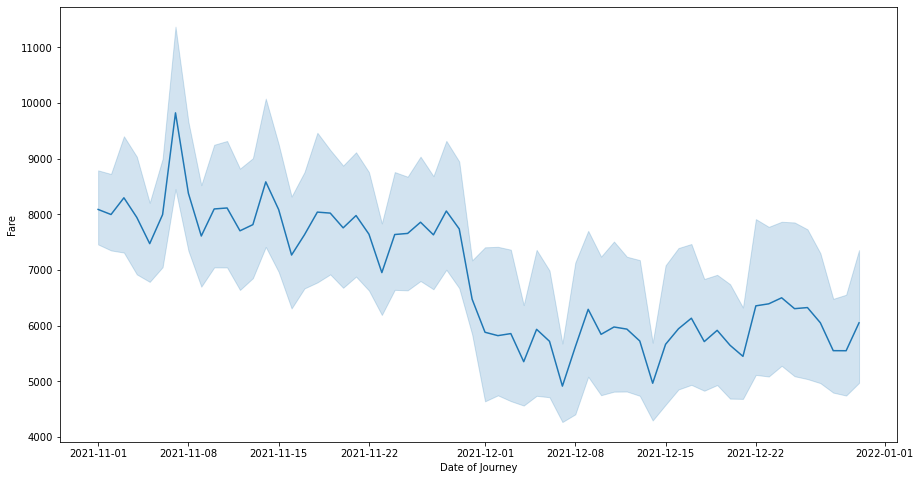

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Date of Journey',y='Fare',data=df)
plt.show()

Observations from the above linechart:
    
    1. Flight fare increases frequently
    2. Flight fare is cheap when you book month or two months before.
    3. Flight fare is costly when you book on day of journey or week before.
    4. Flight fare moves in small increment/decrement.

### Airline V/S Fare

<AxesSubplot:xlabel='Airline', ylabel='Fare'>

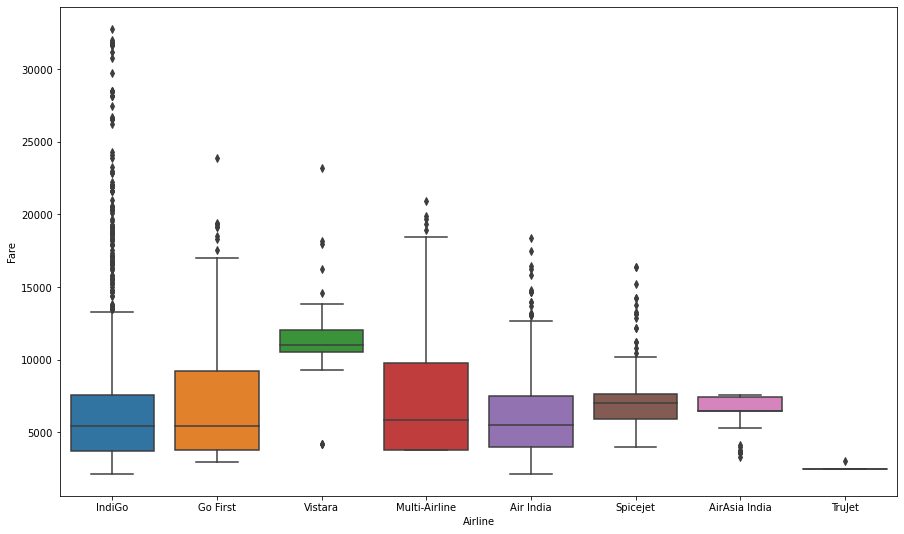

In [39]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Airline',y='Fare',data=df.sort_values('Fare',ascending=False))


From graph we can see that IndiGo have the highest Price.

In [40]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [41]:
Airline.head()

AirAsia India  Go First  IndiGo  Multi-Airline  Spicejet  TruJet  Vistara
0              0         0       1              0         0       0        0
1              0         0       1              0         0       0        0
2              0         0       0              0         0       0        0
3              0         0       1              0         0       0        0
4              0         0       1              0         0       0        0

In [42]:
categorical['Source'].value_counts()

Kolkata       587
Bhopal        527
Nagpur        405
New Delhi     395
Ahmedabad     243
Bengaluru     238
Mumbai        232
Mysore        219
Hyderabad     208
Port Blair    187
Gwalior       109
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

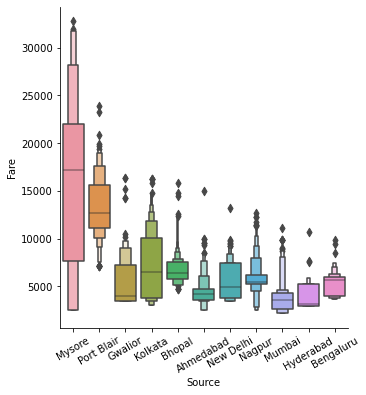

In [46]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Fare',data=df.sort_values('Fare',ascending=False),kind='boxen')
plt.xticks(rotation=30)
plt.show()

#### Destination Vs Price

<Figure size 1080x1080 with 0 Axes>

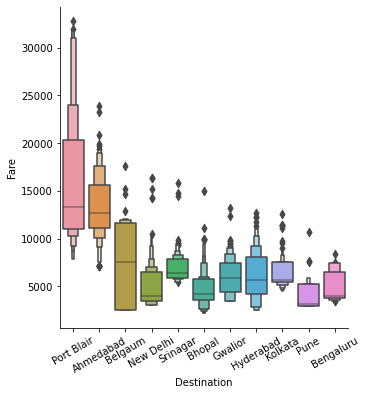

In [47]:
plt.figure(figsize=(15,15))
sns.catplot(x='Destination',y='Fare',data=df.sort_values('Fare',ascending=False),kind='boxen')
plt.xticks(rotation=30)
plt.show()

In [48]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

Bengaluru  Bhopal  Gwalior  Hyderabad  Kolkata  Mumbai  Mysore  Nagpur  \
0          0       0        0          0        0       1       0       0   
1          0       0        0          0        0       1       0       0   
2          0       0        0          0        0       1       0       0   
3          0       0        0          0        0       0       0       0   
4          0       0        0          0        0       0       0       0   

   New Delhi  Port Blair  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0

In [49]:
categorical['Destination'].value_counts()

Bhopal        713
Kolkata       468
Bengaluru     415
New Delhi     323
Port Blair    311
Gwalior       235
Srinagar      228
Pune          208
Ahmedabad     187
Hyderabad     177
Belgaum        85
Name: Destination, dtype: int64

In [50]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

Belgaum  Bengaluru  Bhopal  Gwalior  Hyderabad  Kolkata  New Delhi  \
0        0          0       1        0          0        0          0   
1        0          0       1        0          0        0          0   
2        0          0       1        0          0        0          0   
3        0          0       1        0          0        0          0   
4        0          0       1        0          0        0          0   

   Port Blair  Pune  Srinagar  
0           0     0         0  
1           0     0         0  
2           0     0         0  
3           0     0         0  
4           0     0         0

<AxesSubplot:xlabel='Arival_hour', ylabel='Fare'>

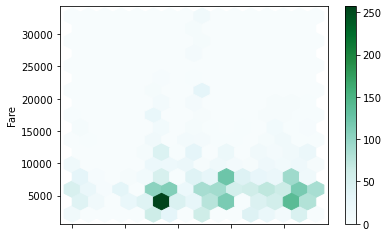

In [53]:
df.plot.hexbin(x='Arival_hour',y='Fare',gridsize=15)

In [54]:
categorical.head()

Airline     Source Destination
0     IndiGo     Mumbai      Bhopal
1     IndiGo     Mumbai      Bhopal
2  Air India     Mumbai      Bhopal
3     IndiGo  Ahmedabad      Bhopal
4     IndiGo  Ahmedabad      Bhopal

In [56]:
final_df=pd.concat([categorical,Airline, source,destination,df[continuous_col]],axis=1)

#### Check for Outliers

In [57]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

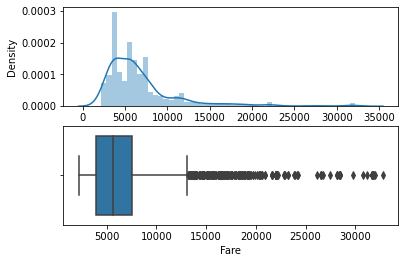

In [58]:
plot(final_df,'Fare')

As there is outliers in price feature,so we replace it with median.

In [59]:
final_df['Price']=np.where(final_df['Fare']>=40000,final_df['Fare'].median(),final_df['Fare'])

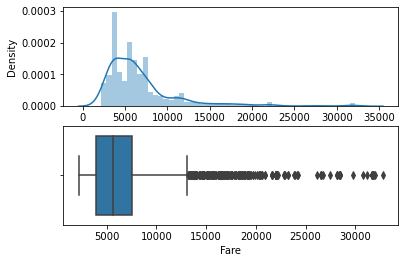

In [60]:
plot(final_df,'Fare')

Seperate the dataset in X and Y columns

In [61]:
X=final_df.drop('Fare',axis=1)

In [66]:
X.drop(['Airline','Source','Destination','Date of Journey'],axis=1,inplace=True)

In [67]:
y=df['Fare']

#### Feature Selection

It is about finding the best feature and having good relation with independent variable Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [68]:
mutual_info_classif(X,y)

array([0.24673431, 0.30813005, 1.6503837 , 0.24010504, 0.29328255,
       0.06898393, 0.08948563, 0.31512644, 0.65762864, 0.18908572,
       0.26064886, 0.70985031, 0.35051593, 0.30131119, 0.57253755,
       0.49079956, 0.22480596, 0.15999818, 0.45794438, 0.80645761,
       0.34499478, 0.27672835, 0.55235313, 0.34646649, 0.50533517,
       0.28816831, 0.27197218, 0.28287083, 1.39303291, 2.34642005,
       2.0476969 , 2.33234542, 1.94403717, 2.21053942, 1.83136762,
       5.3204686 ])

In [69]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

0
AirAsia India   0.282861
Go First        0.286903
IndiGo          1.665722
Multi-Airline   0.247033
Spicejet        0.279029
TruJet          0.081058
Vistara         0.073116
Bengaluru       0.299333
Bhopal          0.609680
Gwalior         0.172209
Hyderabad       0.266839
Kolkata         0.698215
Mumbai          0.345274
Mysore          0.298260
Nagpur          0.580210
New Delhi       0.476338
Port Blair      0.223228
Belgaum         0.148308
Bengaluru       0.481724
Bhopal          0.841644
Gwalior         0.358996
Hyderabad       0.303032
Kolkata         0.547012
New Delhi       0.364580
Port Blair      0.513251
Pune            0.261470
Srinagar        0.305413
journey_day     0.295154
journey_month   1.367671
Departure_hour  2.325594
Departure_min   1.956519
Arival_hour     2.284307
Arival_min      1.948069
dur_hour        2.204749
dur_min         1.896858
Price           5.341815

In [70]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

importance
Price             5.341815
Departure_hour    2.325594
Arival_hour       2.284307
dur_hour          2.204749
Departure_min     1.956519
Arival_min        1.948069
dur_min           1.896858
IndiGo            1.665722
journey_month     1.367671
Bhopal            0.841644
Kolkata           0.698215
Bhopal            0.609680
Nagpur            0.580210
Kolkata           0.547012
Port Blair        0.513251
Bengaluru         0.481724
New Delhi         0.476338
New Delhi         0.364580
Gwalior           0.358996
Mumbai            0.345274
Srinagar          0.305413
Hyderabad         0.303032
Bengaluru         0.299333
Mysore            0.298260
journey_day       0.295154
Go First          0.286903
AirAsia India     0.282861
Spicejet          0.279029
Hyderabad         0.266839
Pune              0.261470
Multi-Airline     0.247033
Port Blair        0.223228
Gwalior           0.172209
Belgaum           0.148308
TruJet            0.081058
Vistara           0.073116

#### Models

In [71]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [72]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

Model is: RandomForestRegressor()
Training score: 0.999993015315707
Predictions are: [ 8693.5   5292.    9191.    4574.04  3558.    3016.    7852.7   7423.
  5102.    7587.    5499.17  3962.    3999.    5838.9   5292.    6665.13
  6018.    7590.    3435.    5638.05  2547.    9590.59 14322.23  3784.
  2163.    6487.    9181.41  3702.    5637.3  31686.03  3557.9   3512.
  3016.    3935.    7423.    3784.    2547.    5292.    3784.    6486.
  5406.    3893.96  3016.    6193.61  4103.38 15606.98  4882.    5505.37
  8473.38  5504.71  6018.    2582.64  6202.55  2500.    3784.   13103.68
  5102.    5519.17 10839.48  5162.94  3016.    3950.51  4726.99  5516.22
  6024.23  2163.    6996.18  5430.48  3701.7   5406.    5477.04  7587.
 18721.36  7034.45  7591.27  4221.    6291.08  5857.    4882.    4221.
  5924.    3692.04  7590.    3016.    5162.94  5165.36 14260.37  5902.75
  7517.    6160.8   3784.    4146.22  5102.    3429.    6486.    5857.
  2163.    7590.    3429.    3553.    2547.    4263. 

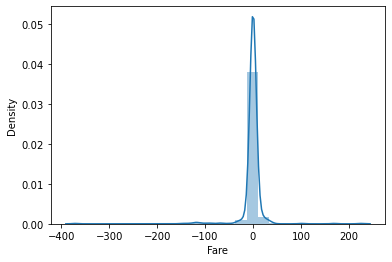

In [73]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.05223880597014925
Predictions are: [ 6018  7590  6018  7590  7590  6018  6486  7590  6018  7590  7590  7590
  6018  7590  7590  6018  6018  7590  7590  7590  7590 21985  7423  7590
  7590  7590  6018  7590  7590 21985  6018  7590  6018  7590  7590  7590
  7590  7590  7590  7590  6018  6018  7590  7590  7590 21985  6018  7590
  6018  6486  7590  7590  7590  7590  7590 11844  7590  6486 11844  7590
  6018  7590  7590  5409  7590  7590  7590  6018  7590  7590  6486  7590
 21985  6486  6486  6018  6486  7590  6018  6486  6018  7590  7590  7590
  7590  6486  6487  7590  6486  6486  6018  7590  6018  7590  7590  7590
  7590  7590  7590  6018  7590  6486  6018  6018  7590  6018  7590  7590
  7590  6486  6018 11844  6018  6018  7590  6486 21985  7590  7590  7590
  7590  6018  6018  7590  7590  6018  7590  7590  7590  6486  6018  6018
  7423  7590  7590  6018  6018  7590  6018  6018  7590 11844 11844  7590
  7590 21985  6486  7590  6486 21985  75

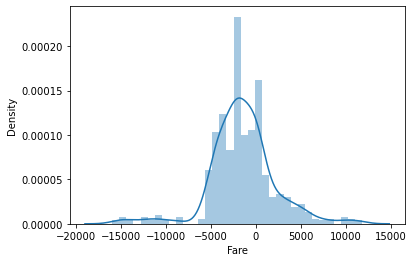

In [74]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.9999567481660668
Predictions are: [ 8697.2  5292.   9191.   4588.4  3558.   3016.   7849.2  7410.   5102.
  7587.   5492.6  3962.   4000.6  5839.   5292.   6684.   6018.   7590.
  3435.   5638.4  2547.   9547.6 14369.8  3784.   2163.   6487.   9191.
  3702.   5638.4 31701.2  3558.   3512.   3016.   3935.   7423.   3784.
  2547.   5292.   3784.   6486.   5406.   3894.   3016.   6189.2  4101.6
 15573.4  4882.   5499.2  8484.4  5491.6  6018.   2583.   6205.8  2500.
  3784.  13104.   5102.   5509.4 10812.4  5170.4  3016.   3937.6  4730.4
  5505.8  6018.   2163.   6996.6  5418.6  3702.   5406.   5477.8  7587.
 18770.   7052.   7592.6  4221.   6289.2  5857.   4882.   4221.   5924.
  3692.   7590.   3016.   5170.4  5166.8 14538.   5912.2  7517.   6169.4
  3784.   4142.8  5102.   3429.   6486.   5857.   2163.   7590.   3429.
  3553.   2547.   4263.   3784.   3553.   3784.   9191.  12605.   3894.
  3806.   3785.4  5406.  11844.   6110.8  7416.  

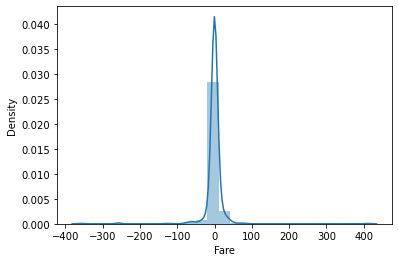

In [75]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 1.0
Predictions are: [ 8694.  5292.  9191.  4574.  3558.  3016.  7853.  7423.  5102.  7587.
  5498.  3962.  3999.  5839.  5292.  6648.  6018.  7590.  3435.  5637.
  2547.  9517. 14354.  3784.  2163.  6487.  9213.  3702.  5637. 31675.
  3558.  3512.  3016.  3935.  7423.  3784.  2547.  5292.  3784.  6486.
  5406.  3894.  3016.  6194.  4059. 15557.  4882.  5504.  8475.  5498.
  6018.  2583.  6212.  2500.  3784. 13104.  5102.  5522. 10846.  5162.
  3016.  3948.  4724.  5522.  6018.  2163.  6995.  5433.  3702.  5406.
  5477.  7587. 18651.  6995.  7603.  4221.  6289.  5857.  4882.  4221.
  5924.  3692.  7590.  3016.  5162.  5166. 14354.  5903.  7517.  6161.
  3784.  4145.  5102.  3429.  6486.  5857.  2163.  7590.  3429.  3553.
  2547.  4263.  3784.  3553.  3784.  9191. 12669.  3894.  3806.  3791.
  5406. 11840.  6099.  7423.  5102. 11715.  8395.  7590.  5733.  5855.
  3435.  3889.  5522.  3645.  3784.  5754.  3435.  3999.  5778.  3437.
  2951

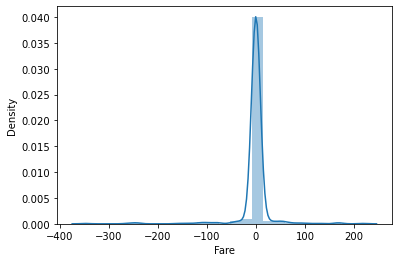

In [76]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.035382968414566784
Predictions are: [6033.04825468 5593.90319367 6089.30901376 5510.57485796 5411.7750215
 5370.31352805 5929.05871669 5872.8962451  5570.96058037 5894.48765735
 5619.3873003  5447.99170024 5451.51619935 5662.74634289 5593.90562689
 5769.47520395 5685.99093369 5894.87311799 5401.63228081 5636.89997644
 5341.46370535 6130.67754198 6330.90533489 5431.50928534 5322.87473321
 5747.98036834 6091.37192603 5424.18868926 5636.90060246 5912.86862087
 5411.78087376 5407.94566688 5370.31294475 5445.43333792 5872.89698854
 5431.50886638 5341.46502353 5593.90855661 5431.50493868 5747.85005636
 5607.92618682 5441.59014331 5370.31740682 5709.10300799 5461.51985454
 6306.19973716 5545.16200737 5620.13612649 6006.91618888 5620.01166853
 5685.98818711 5343.43240699 5711.47971934 5338.94197493 5431.50331984
 6330.84316391 5570.96285834 5622.76841185 6238.22824497 5578.14961685
 5370.31163801 5446.66032986 5527.18160247 5622.39373866 5687.2955271
 5322.874

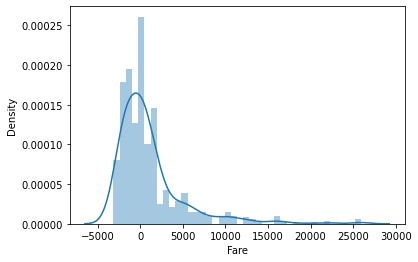

In [77]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.9999691145123136
Predictions are: [ 8749.45304778  5281.74871668  9179.44233482  4629.21464631
  3559.4903231   3016.51844354  7833.1984521   7419.78696473
  5119.11159454  7588.37785902  5500.98236443  3933.40028748
  4034.68499844  5838.26763199  5286.0893259   6627.4596152
  6021.08867522  7587.79477378  3435.98483684  5665.90567136
  2550.38348962  9601.73783047 14464.46680104  3779.81657088
  2170.89654599  6485.00316767  9190.56351232  3705.52878081
  5665.90567136 31670.4337391   3562.23336454  3506.26179803
  3016.51844354  3930.77657634  7423.66067571  3779.81657088
  2550.38348962  5287.66123019  3782.32998148  6488.27486342
  5407.58364552  3884.01722414  3017.41642933  6226.15138453
  4039.9735591  15541.47749726  4871.6729649   5505.59384246
  8509.10363198  5511.43026879  6020.45394433  2582.28547673
  6228.90316155  2502.77524724  3786.8183694  13097.03466779
  5113.59097792  5510.41168524 10864.31153465  5125.08171

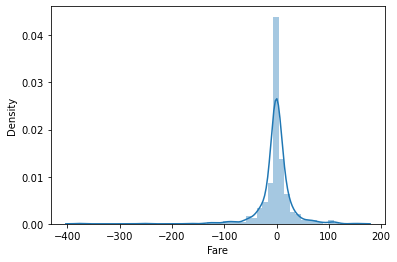

In [78]:
predict(GradientBoostingRegressor())

#### Hypertunning the model

In [79]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [80]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 20}

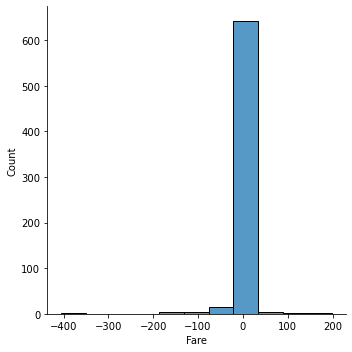

In [82]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [83]:
r2_score(y_test,prediction)

0.9999712242609143

#### Model saving

In [84]:
import joblib
joblib.dump(rf,'flightpriceprediction.pkl')

['flightpriceprediction.pkl']